### Lasso & Ridge normalization on linear regression (on Generated Dataset)

### Jay Bhanushali

### 60009200047

### K2 Batch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,8)

Generated data (Single feature)

Text(0.5, 1.0, 'X vs y')

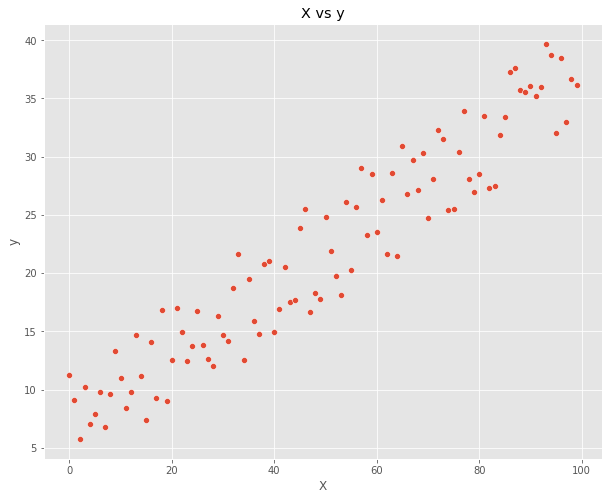

In [3]:
# Generate random data

X = np.arange(0,100) # integers from 0 to 99 (to generate 100 datapoints)

noise = np.random.uniform(-5,5, size=(100,))

y = 0.3*X + 7 + noise

df=pd.DataFrame( {'X' : X , 'y':y} )
#plot the data

ax = sns.scatterplot(x = "X", y = "y", data = df)
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("X vs y")


In [4]:
df

,X,y
0,0,11.226871
1,1,9.139687
2,2,5.747928
3,3,10.198610
4,4,7.065772
...,...,...
95,95,32.042256
96,96,38.492526
97,97,32.967889
98,98,36.707074


Function for root mean square error

In [5]:
def rmse(y, y_hat):
    y, y_hat = np.squeeze(y), np.squeeze(y_hat)
    n = len(y)
    error = np.sqrt( (1/n) * np.sum( (y-y_hat)**2 ) )
    return error


In [6]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [7]:
#Linear
def LinearRegressionModel(df):
    X=df.X.values.reshape(-1,1)
    y=df.y.values.reshape(-1,1)

    model = LinearRegression().fit(X , y)
    y_hat = model.predict(X)   

    error = rmse(y,y_hat)
    return error

In [8]:
#Lasso
def LassoRidge(df):
    X=df.X.values.reshape(-1,1)
    y=df.y.values.reshape(-1,1)

    lasso_model = Lasso(alpha=0.01).fit(X , y)
    ridge_model = Ridge(alpha=0.01).fit(X , y)

    y_hat_lasso = lasso_model.predict(X)   
    y_hat_ridge = ridge_model.predict(X)   

    lasso_error = rmse(y,y_hat_lasso)
    ridge_error = rmse(y,y_hat_ridge)
    return lasso_error, ridge_error

In [9]:
errors = []
lr = LinearRegressionModel(df)
lasso, ridge = LassoRidge(df)
err = (lr, lasso, ridge)
print(f"Root mean square errors:\n\nLinear Regression: {err[0]}\nLasso Regression: {err[1]}\nRidge Regression: {err[2]}")

Root mean square errors:

Linear Regression: 2.8716002629848547
Lasso Regression: 2.871600283881217
Ridge Regression: 2.8716002629850474


As we can see, RMSE is equal (up to 4 decimal places) for all three methodes. Linear performs same as Lasso and rigde for single feature

Generating multivariate data

In [10]:
# Generate random data

X_0 = np.arange(0,100) # integers from 0 to 99 (to generate 100 datapoints)
X_1 = [2*x for x in X_0] # 0, 2, 4 ... 198 (double the values of X_0)
X_2 = [x**0.5 for x in X_0] # roots of X_0
X_3 = [x**2 for x in X_0] # squares of X_0


noise = np.random.uniform(-5,5, size=(100,))

y = np.multiply(X_0, 0.3) + np.multiply(X_1, 0.3) + X_2 + X_3 + 7 + noise

df=pd.DataFrame( {'X_0' : X_0,'X_1' : X_1, 'X_2' : X_2,'X_3' : X_3, 'y':y} )
df

,X_0,X_1,X_2,X_3,y
0,0,0,0.000000,0,11.853309
1,1,2,1.000000,1,13.739626
2,2,4,1.414214,4,13.363810
3,3,6,1.732051,9,23.783221
4,4,8,2.000000,16,27.517352
...,...,...,...,...,...
95,95,190,9.746794,9025,9122.753465
96,96,192,9.797959,9216,9319.982785
97,97,194,9.848858,9409,9514.229679
98,98,196,9.899495,9604,9711.852642


In [11]:
X = df.iloc[:,0:4]
y = df.y

In [12]:
def compare_Linear_Lasso_Ridge(X,y): 
    lr_model = LinearRegression().fit(X , y)
    lasso_model = Lasso(alpha=0.001).fit(X , y)
    ridge_model = Ridge(alpha=0.001).fit(X , y)

    y_hat_lr = lr_model.predict(X)   
    y_hat_lasso = lasso_model.predict(X)   
    y_hat_ridge = ridge_model.predict(X)   

    lr_error = rmse(y,y_hat_lr)
    lasso_error = rmse(y,y_hat_lasso)
    ridge_error = rmse(y,y_hat_ridge)
    return lr_error, lasso_error, ridge_error

In [13]:
err = compare_Linear_Lasso_Ridge(X,y)
print(f"Root mean square errors:\n\nLinear Regression: {err[0]}\nLasso Regression: {err[1]}\nRidge Regression: {err[2]}")

Root mean square errors:

Linear Regression: 2.8419286086870326
Lasso Regression: 3.0680943230673545
Ridge Regression: 2.8419286086878714
